(problema de clase: 20 Ago 19, Rodolfo Ernesto Aviña Varela)
# El problema de los Sofas

En una empresa hacen dos tipos de sofas, A y B.

#### Objetivo

Maximizar $G=100A + 250B$

#### Sujeto a

1. $A + 2B \leq 80$ 
2. $0.75A + 0.5B \leq 20$
3. $A \leq 50$
4. $B \leq 10$

Todos los conjuntos valores de A y B que satisfacen las 4 restricciones son soluciones posibles. Pero nosotros estamos buscando la óptima. Para hallarla exploraremos de momento dos técnicas, que son la misma idea vista desde dos perspectivas.

## Solución optima por el método gráfico

Graficamos las desigualdades 1 a 4 sustituyendo el signo de desigualdad por uno de igualdad. Se generará un polígono en el cuál todo punto en su interior o en la frontera constituye una solución.

Para elegir la solución óptima se asignan valores crecientes arbitrarios a la función de ganancia y se grafica. Una característica importante de la solución de PL óptima es que siempre está asociada con un punto esquina del polígono de soluciones. Esto es cierto incluso si la función objetivo es paralela a una restricción, en cuyo caso la solución sería cualquier punto sobre ese lado del poligono.

In [2]:
import matplotlib.pyplot as plt # para graficar
import numpy as np # manejo de matrices
from itertools import combinations # combinaciones C(n,m)

Ganancia_0 = 0
Ganancia_1 = 400
Ganancia_2 = 800
Ganancia_3 = 1200
Ganancia_4 = 1600
Ganancia_5 = 2000
Ganancia_6 = 2400
Ganancia_7 = 2800
Ganancia_8 = 3200
Ganancia_9 = 3600
Ganancia_10 = 4000
Ganancia_11 = 4400


(0, 60)

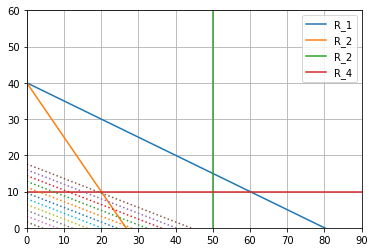

In [16]:
A = np.linspace(0,120,120) # Generamos 120 numeros entre 0 y 120 igualmente espaciados
R_3 = np.linspace(0,120,120)

#restricciones
B=[40-A/2.0,40 -1.5*A, R_3, 0*A + 10] # es un vector de restricciones

# valores de z
Zn = np.arange(0,5000,400)

#graficar ecuaciones
for i in range(4): # restricciones
    if i == 2:
        plt.plot(A*0+50,B[i],label="R_"+str(i))
    else:
        plt.plot(A,B[i],label=B_names[i])

for i in range(len(Zn)-1):
    z = Zn[i]
    print("Ganancia_"+str(i)+" = "+str(z))
    g = z/250.0 - 100.0*A/250.0 # ecuación de ganancia
    plt.plot(A, g, linestyle=':')
    
# formato de la grafica
plt.legend() 
plt.grid(all)
plt.xlim(0,90)
plt.ylim(0,60)

La ecuación de ganacia 0 pasa por el origen, y al ir aumentandola la intersección de la ecuación de ganancia con el eje vertical es un número mayor. La ganancia 11 es la ecuación que pasa po el punto 20,10.

Al cambiar el valor de la ganancia nos damos cuenta que el punto que maximiza la ganancia está en (x,y)=(20,10), sin embargo la solución gráfica no es suficiente, habrá que hallar una solución analítica a este problema.

## Metodo algebraico

El método algebráico da la solución o conjunto de soluciones analíticas del problema anterior. Es decir, hallamos los puntos donde se intersectan las restricciones y ya que sabemos que éstas corresponden a los puntos esquina, una de ellas es la solución óptima.

Al convertir las desigualdades en igualdades, se agregan variables de "holgura", una por cada restricción. En los problemas de PL se estudian sistemas de ecuaciones, m ecuaciones y n incógnitas. Para hallar la solución a dichos sistemas generamos una matriz $m\times n$ con del sistema de ecuaciones. Comunmente tenemos n>m, esto significa que tendremos una cantidad infinita de soluciones. Para poder resolver estos sistemas indeterminados hacemos que n-m incógnitas sean 0, usando todas las combinaciones $C^n_m$ de variables, una por iteración y se resuelve la matriz resultante (que ahora es una matriz cuadrada de $m\times m$). En cada iteración lo que hallamos son un punto donde el sistema de ecuaciones se satisface o que quizá que el sistema no tiene solución para ese conjunto de variables igualadas a cero.

Aunque n=m es un sistema determinado rara vez se dan en PL porque, su solución es única y no haría falta igualar variables a cero.

In [5]:
# coeficientes de la ecuación de ganancia, 
# los 2 últimos corresponden a las variables de holgura agregadas
ganancia=[1,-100,-250,0, 0] 

# solo se tomaron la restriccion 2 y 4 porque como podemos
# ver la gráfica las restricciones 1 y 3 no generan la región
# de soluciones.
restriccion2=[0, 3/4.0, 1/2.0, 1, 0] 
restriccion4=[0, 0, 1, 0, 1]

# terminos independientes de las 3 ec.s anteriores,
# el primero corresponde a la ganancia y los otros dos a las 
# restricciones 2 y 4
C=[0,20,10] 
C=np.array(C) #conversión de la lista C a un arreglo numpy

matriz_expandida = [ganancia,restriccion2,restriccion4]
S = np.array(matriz_expandida, dtype=float)
print("Esta es la matriz expandida:")
print(S)

Esta es la matriz expandida:
[[   1.   -100.   -250.      0.      0.  ]
 [   0.      0.75    0.5     1.      0.  ]
 [   0.      0.      1.      0.      1.  ]]


In [7]:
# El atributo shape devuelve la forma de la matriz, 
# en este caso (3,5), el indice del primer elemento es cero
n = S.shape[1] 
m = S.shape[0]

# Generando todas las posibles combinaciones de 2 variables igualas a cero
solNB = [x for x in combinations(range(1,n+1),n-m)]
print("Todas las posibles combinaciones de variables cero que hacen a la matriz una matriz cuadrada.")
print(solNB)

Todas las posibles combinaciones de variables cero que hacen a la matriz una matriz cuadrada.
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


In [8]:
# Estas funciones sirven para eliminar columnas dadas las incógnitas que se deben igualar a cero en cada iteración
def remjc(A, j):
    '''remjrc (remove j column) substracts the i+1-th column from agiven matrix
        B = mip1(A,j)
        A, the matrix
        j, the column that want to remove, j must be >= 1
        B, the returned matrix
        '''
    #verifing j>=1
    if(j<1):
        return print("j>=1 !, take the first row, col as 1, not as 0")
    i=j-1
    
    #removing j-th col
    Al, Am, Ar = np.hsplit(A,[i,i+1])
    A2 = np.hstack([Al,Ar])
    return A2

''' De la matriz original, quitar las incognitas q1, q1, ..., q(n)'''
def remq(A,q):
    '''remover q incógnitas de una matriz rectangular
        q debe ser dado en orden con q1<q2<...<qn''' 
    #casting tuple to list
    q = [ qi for qi in q]
    
    #verifing ordered list
    for i in range(len(q)-1):
        for j in np.arange(i,len(q)):            
            if q[i]>q[j]:
                return print("error: remq(A,q) , escribir q en orden: q[0]<q[1]<...<q[len(q)-1]")
    
    i=0    
    for qi in q:
        A = remjc(A,qi)
        if (i+1)<=(len(q)-1):
            q[i+1]=q[i+1]-(i+1)
        else:
            return A
        i = i + 1

In [12]:
# definimos el nombre de las incognitas, la primera es z, indice 0,
# la segunda es x, indice 1 y asi susesivamente.
incognitas = ['z','x','y','h1','h2'] 


# cómo leer las soluciones
print("...................................")
print("¿Cómo leer las soluciones?")
print("...................................")
print("1: Las incognitas son: z, x, y, h1, h2")
print("2: Si las incógnitas igualadas a cero son, por ejemplo x, h1:")
print("3: Y la solución mostrada es, por ejemplo:")
print("4: [-0. 20. 10.]")
print("5: Entonces, llendo en orden según las incógnitas fueron mostradas en la línea 1,\n quitando las incógnitas igualadas a cero, la solución debe leerse, para este ejemplo como:")
print("6: Z=-0, y=20, h2=10")

for solNBi in solNB: # para cada una de las combinaciones de incognitas igualadas a cero    
    M=remq(S,solNBi) # de la matriz expandida remueve las columnas que correspondan a esas incognitas
    
    # imprimir la solución de la ahora matriz cuadrada
    # sin las incognitas igualadas a cero
    print("-----------------------------------")
    print("incógnitas igualadas a cero: "+ incognitas[solNBi[0]-1]+" , "+ incognitas[solNBi[1]-1])
    
    # revisa si la matriz es determinada, si es indeterminada el det(M)=0
    if np.linalg.det(M) != 0: # si el determinante de M es distinto de 0, 
        Q=np.linalg.solve(M,C) # entonces halla la solución de la ecuación matricial M X = C           
        print(Q) # imprime el resultado
        if Q[0]<0 or Q[1]<0 or Q[2]<0: # en caso de que alguna de las respuestas sea menor a cero
            # la descartamos porque las soluciones deben ser positivas
            print("!: solución descartada por criterio de no-negatividad")
    else: #si el determinante es cero, avísame!
        print("!: solucion indeterminada")
        print(M)
        print("uno de los renglones es cero, o dos renglones son multiplos, el det(M)=0")

...................................
¿Cómo leer las soluciones?
...................................
1: Las incognitas son: z, x, y, h1, h2
2: Si las incógnitas igualadas a cero son, por ejemplo x, h1:
3: Y la solución mostrada es, por ejemplo:
4: [-0. 20. 10.]
5: Entonces, llendo en orden según las incógnitas fueron mostradas en la línea 1,
 quitando las incógnitas igualadas a cero, la solución debe leerse, para este ejemplo como:
6: Z=-0, y=20, h2=10
-----------------------------------
incógnitas igualadas a cero: z , x
[-0. 20. 10.]
-----------------------------------
incógnitas igualadas a cero: z , y
[-0. 20. 10.]
-----------------------------------
incógnitas igualadas a cero: z , h1
[ 36.36363636 -14.54545455  24.54545455]
!: solución descartada por criterio de no-negatividad
-----------------------------------
incógnitas igualadas a cero: z , h2
[-25.    10.    33.75]
!: solución descartada por criterio de no-negatividad
-----------------------------------
incógnitas igualadas a 

Analizando las soluciones dadas tenemos que la ganacia es máxima en (x,y)=(20,10). Como habíamos hallado por el método gráfico.